In [1]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [42]:
m,a = np.load('../mcerr/s39170_m0.015_a3.0.npy')
mnc,anc = np.load('../mcerr/s39170_m0.015_a3.0NC.npy')
mdf,adf = np.load('../mcerr/s39170_m0.015_a3.0DF.npy')

In [22]:
def Plot_2d(metal_list, age_list, true_m, true_a, title):
    plt.figure(figsize=[8,8])
    # sea.kdeplot(metal_list, age_list)
    plt.scatter(metal_list, age_list, marker='o')
    plt.title(title)
    plt.scatter(true_m, true_a,color='r')
    plt.axis([0,0.03,0,6])
    plt.show()
    plt.close()

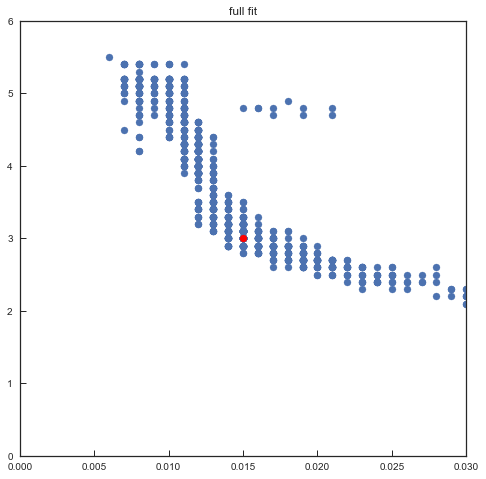

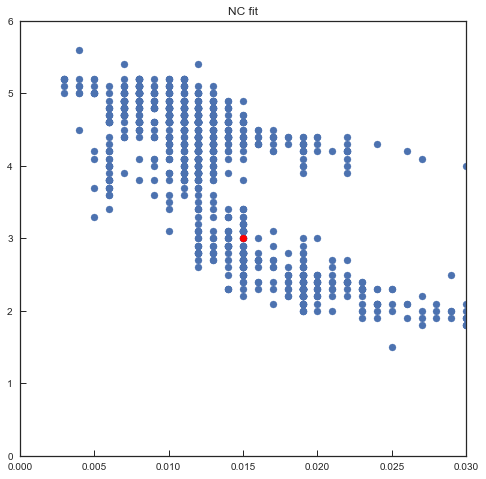

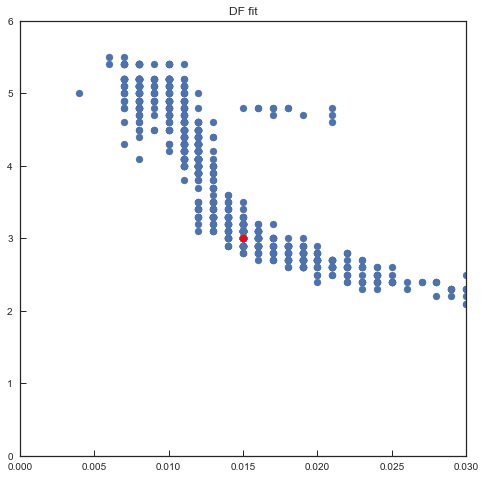

In [44]:
%matplotlib inline
Plot_2d(m,a,0.015,3.0,'full fit')
Plot_2d(mnc,anc,0.015,3.0,'NC fit')
Plot_2d(mdf,adf,0.015,3.0,'DF fit')

In [45]:
print np.median(m),np.mean(m)
print np.median(mnc),np.mean(mnc)
print np.median(mdf),np.mean(mdf)
print np.median(a),np.mean(a)
print np.median(anc),np.mean(anc)
print np.median(adf),np.mean(adf)

0.013 0.014116
0.012 0.013128
0.013 0.013869
3.4 3.6836
4.3 3.9371
3.7 3.77


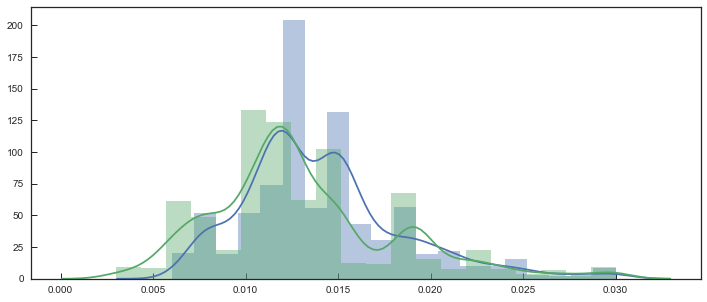

In [46]:
plt.figure(figsize=[12,5])
sea.distplot(m,20)
sea.distplot(mnc,20)
# sea.distplot(mdf,20)
plt.show()
plt.close()

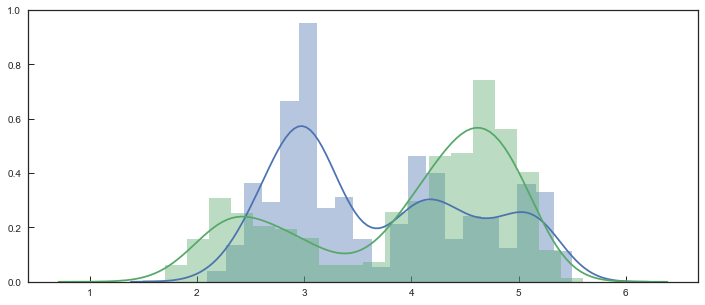

In [48]:
plt.figure(figsize=[12,5])
sea.distplot(a,20)
sea.distplot(anc,20)
# sea.distplot(adf,20)
plt.show()
plt.close()